# Machine Learning Lab

This project aims at comparing the efficiency of Convolutional Neural Networks (CNN) with respect to Random Forest (RF) algorithms for the classification of data in the MNIST-fashion dataset.

### Summary
The results of the project are delivered in this Jupyter Notebook as code cells that run the algorithms and markdown cells in order to provide comments. Both algorithms are imported from `classifiers.py` where the user can find the code.

In [15]:
from classifiers import CNN, RandomForest

 Both algorithms will follow this workflow:
 
1. load dataset
2. partition the dataset into a training and a test subsets
3. create a model (NN or forest)
4. train the model with the training subset
5. evaluate performances through the test subset

It is quite natural to implement the algorithms as subclasses that inherit most of their methods from a common parent class. In `classifiers.py` the user will find both the parent abstract class and the two sons. Since the user's primary goal is point 5, there is no need to call methods 1 to 4 in this Notebook: the code is structured such that a method called `evaluate` will return every goodness-of-fit indicator and run points 1 to 4 itself with help from che class constructor and a data-loading class in `data_loader.py`.

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

### Convolutional Network

The CNN is built as follows:

1. `Conv2D(kernel_size=5)`
    - `MaxPooling2D`
    - `Dropout`
1. `Conv2D(kernel_size=3)`
    - `MaxPooling2D`
    - `Dropout`
3. `Flatten`
4. `Dense`

Both convolutional layers have `relu` as activation function: this is quite common when dealing with CNNs. The final dense layer has `softmax`. The loss function is categorical cross-entropy: this is also common for CNNs.
Every other parameter of the network has to be stated by the user in a dictionary as input when the object is created. We shall use the following configuration.

In [ ]:
optimizers = ['SGD', 'Adam']#, 'RMSprop', 'Adagrad', 'Adamax', 'Nadam']
config_dicts = [{
    'epochs': 5,
    'dropout': 0.2,
    'batch_size': 32,
    'optimizer': optimizer,
} for optimizer in optimizers]

It is quite useful to check the behavior of the network with different optimizers and that is why the code above initializes a list of dictionaries. We shall therefore inizialize a list of `CNN` objects.

In [13]:
neuralnets = [CNN(keras.datasets.fashion_mnist, config_dict) for config_dict in config_dicts]

With the following line we build, train and test the networks and get their evaluation parameters.

In [14]:
cnn_scores = [neuralnet.evaluate() for neuralnet in neuralnets]

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets

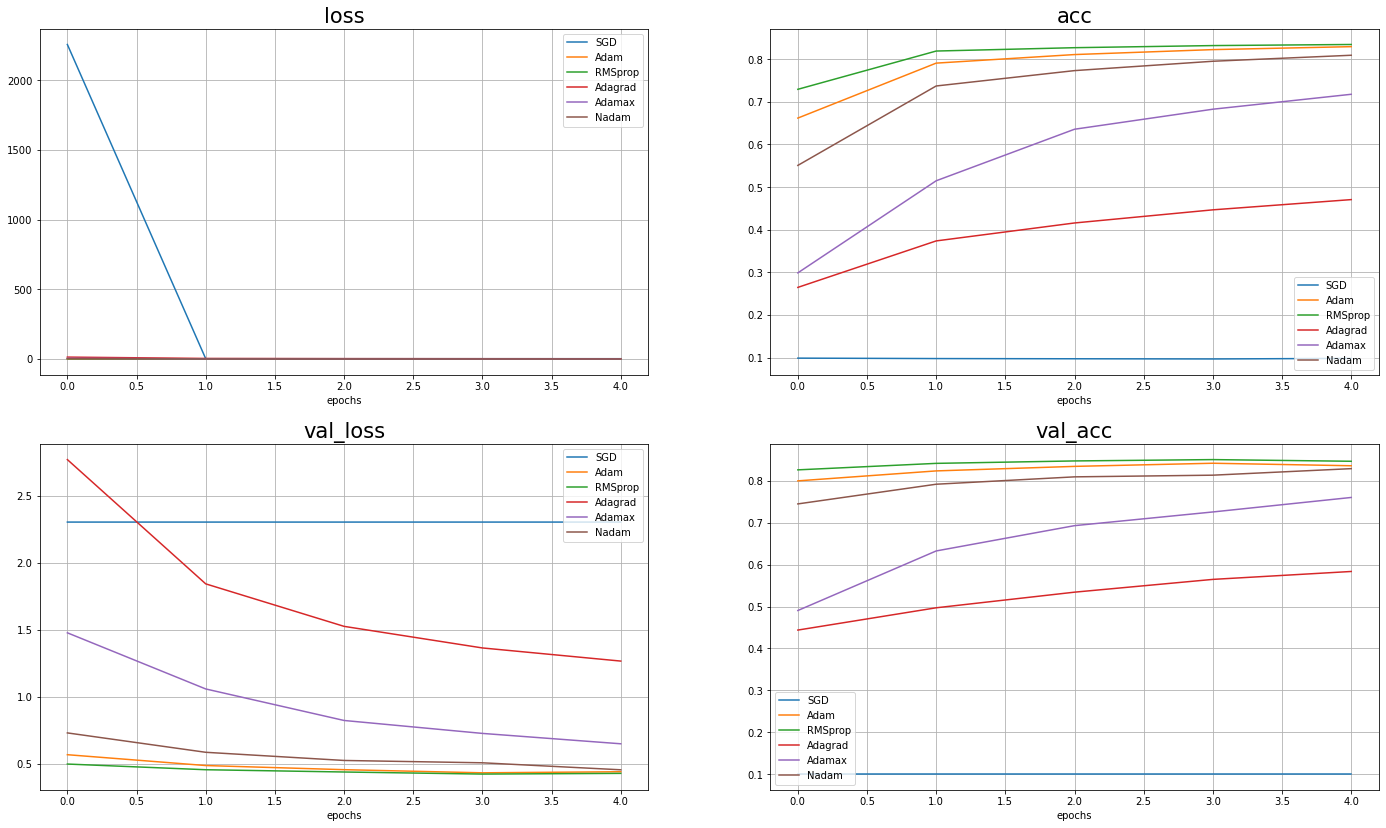

In [11]:
indicators = ['loss', 'acc', 'val_loss', 'val_acc']
fig, axs = plt.subplots(2, 2, figsize=(24,14))
for ax, indicator in zip(axs.flatten(), indicators):
    ax.set_title(indicator, fontsize=21)
    ax.set_xlabel('epochs')
    ax.grid(True)
    for h, nn in zip(history, neuralnets):
        ax.plot(h.history[indicator], label=nn.optimizer)
        ax.legend()

In [12]:
for nn in neuralnets:
    nn.evaluate()

CNN with optimizer: SGD Loss: 2.3026 Accuracy: 0.1000
CNN with optimizer: Adam Loss: 0.4408 Accuracy: 0.8361
CNN with optimizer: RMSprop Loss: 0.4286 Accuracy: 0.8468
CNN with optimizer: Adagrad Loss: 1.2660 Accuracy: 0.5837
CNN with optimizer: Adamax Loss: 0.6492 Accuracy: 0.7604
CNN with optimizer: Nadam Loss: 0.4553 Accuracy: 0.8292


### Random Forest

In [2]:
config = {
    'n_estimators': 10,
    'criterion': 'entropy'
}
rf = RandomForest(keras.datasets.fashion_mnist, config)
cm, acc, report = rf.evaluate()

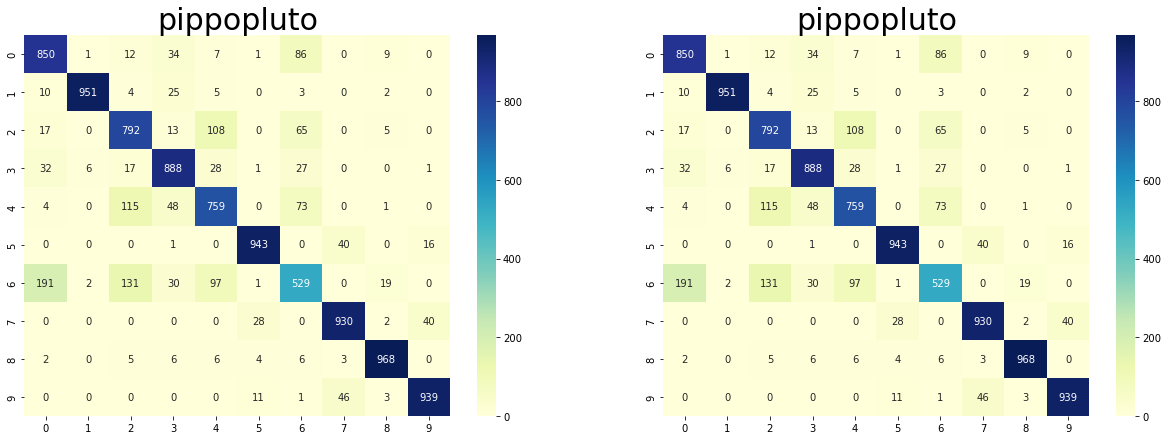

In [11]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, figsize=(21, 7))
for ax in axs:
    ax.set_title('pippopluto', size=30)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)

In [13]:
type(report)

str

In [15]:
report

'              precision    recall  f1-score   support\n\n           0       0.77      0.85      0.81      1000\n           1       0.99      0.95      0.97      1000\n           2       0.74      0.79      0.76      1000\n           3       0.85      0.89      0.87      1000\n           4       0.75      0.76      0.76      1000\n           5       0.95      0.94      0.95      1000\n           6       0.67      0.53      0.59      1000\n           7       0.91      0.93      0.92      1000\n           8       0.96      0.97      0.96      1000\n           9       0.94      0.94      0.94      1000\n\n    accuracy                           0.85     10000\n   macro avg       0.85      0.85      0.85     10000\nweighted avg       0.85      0.85      0.85     10000\n'

In [3]:
import pandas as pd
df = pd.DataFrame(report).transpose()

In [4]:
df

,precision,recall,f1-score,support
0,0.768535,0.8500,0.807217,1000.0000
1,0.990625,0.9510,0.970408,1000.0000
2,0.736059,0.7920,0.763006,1000.0000
3,0.849761,0.8880,0.868460,1000.0000
4,0.751485,0.7590,0.755224,1000.0000
5,0.953488,0.9430,0.948215,1000.0000
6,0.669620,0.5290,0.591061,1000.0000
7,0.912659,0.9300,0.921248,1000.0000
8,0.959366,0.9680,0.963664,1000.0000
9,0.942771,0.9390,0.940882,1000.0000
